# DSCI 503 – Project 02
### Nicholas Allen
Due February 6, 2022

In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
This function imitates a series of daily stock prices

In [2]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size=days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    daily_prices = np.round(start * daily_multipliers,2)
    daily_prices = np.concatenate(([start], daily_prices))
    return daily_prices

#testing the fucntionality and correct operation of simulate_stock function

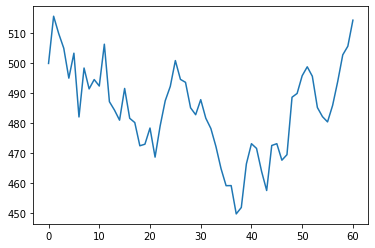

514.44


In [3]:
np.random.seed(1)
sixty_tst = simulate_stock(500,0.08,.3,60)
plt.plot(sixty_tst)
plt.show()
print(sixty_tst[-1])

## Part B: Annual Yield Function
This setion takes Part A as input and calculates the annual yield during the duration

In [4]:
def find_yield(run):
    annual_yield = math.log(run[-1]/run[0]) * (252/(len(run)-1))
    return np.round(annual_yield,4)

testing of the find_yield function follows

In [5]:
print(find_yield(sixty_tst))

0.1196


Following we delve into the possible variability in our simulated stock prices by graphing 25 such simulations

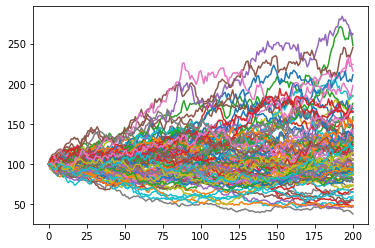

In [6]:
output = []
for i in range(1,101):
    sim = simulate_stock(100,.06,.4,200)
    output.append(find_yield(sim))
    plt.plot(sim)

Below we output the annual yields for each of the above simulated runs

In [7]:
print(output)

[0.6611, 0.2836, 0.3501, 0.1506, 0.0198, 0.3635, 0.9697, -0.5283, 0.7798, -0.6351, 0.4319, -0.1446, 0.2234, -0.4586, 0.4608, 0.4768, -0.0479, -1.2092, 0.0748, 0.7724, 0.3386, -0.0558, 1.1441, 0.6283, 0.1978, -0.1716, 0.3154, -0.385, -0.1654, -0.689, -0.1713, 0.3519, 0.4076, -0.9495, -0.2381, -0.3226, -0.0687, 0.0628, 0.2622, 0.1462, 0.3093, 0.3128, 0.5839, -0.1038, 0.5015, 0.1305, 1.0158, 0.0058, -0.3784, -0.1774, 0.9417, -0.0167, -0.0238, -0.0931, 0.335, 0.3589, 0.4056, 0.2239, -0.1816, 0.2541, 0.6281, 0.3669, 0.7089, -0.7528, -0.904, -0.7478, 0.2507, 0.559, -0.0827, -0.0525, 0.3735, -0.9272, 0.2722, 0.4847, 1.2149, 1.1301, 0.1593, -0.0064, -0.3869, -0.0858, -0.2713, 0.5454, 0.3096, 0.2659, -0.2618, -0.1029, 0.8592, 0.1959, 0.1627, -0.5418, -0.0633, -0.078, -0.2669, 0.6366, 0.0861, 0.0712, 0.6846, -0.2671, 0.0617, 0.2564]


## Part C: Finding Seeds that Generate Specific Outcomes
The goal of this sections is trial and error with NumPy's seeding capabilties to produced the desired results. 

In the cell below, Stock A has the highest simulated final price.

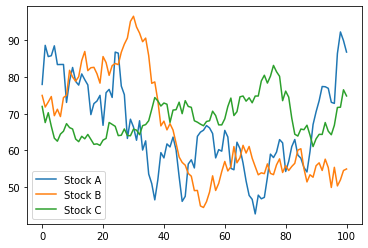

In [8]:
np.random.seed(7)
part_c_days = 100
stockA = simulate_stock(78, .04, 1.2, part_c_days)
stockB = simulate_stock(75, .08, .8, part_c_days)
stockC = simulate_stock(72, .16, .6, part_c_days)
plt.plot(stockA, label='Stock A')
plt.plot(stockB, label='Stock B')
plt.plot(stockC, label='Stock C')
plt.legend()

In the cell below, Stock B has the highest simulated final price.

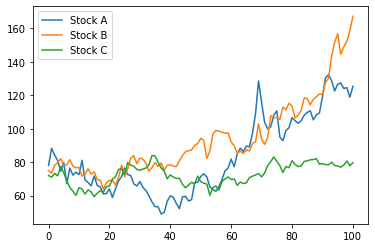

In [9]:
np.random.seed(1)
part_c_days = 100
stockA = simulate_stock(78, .04, 1.2, part_c_days)
stockB = simulate_stock(75, .08, .8, part_c_days)
stockC = simulate_stock(72, .16, .6, part_c_days)
plt.plot(stockA, label='Stock A')
plt.plot(stockB, label='Stock B')
plt.plot(stockC, label='Stock C')
plt.legend()

In the cell below, Stock C has the highest simulated final price.

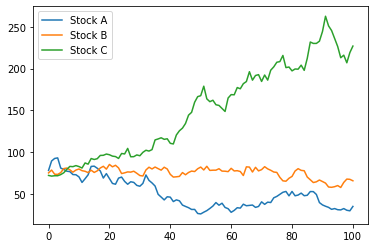

In [10]:
np.random.seed(3)
part_c_days = 100
stockA = simulate_stock(78, .04, 1.2, part_c_days)
stockB = simulate_stock(75, .08, .8, part_c_days)
stockC = simulate_stock(72, .16, .6, part_c_days)
plt.plot(stockA, label='Stock A')
plt.plot(stockB, label='Stock B')
plt.plot(stockC, label='Stock C')
plt.legend()

## Part D: Monte Carlo Simulation
In this section we will be using a large number of simulations to explore the possible ranges of outcomes and attempt to derive the liklihood of those outcomes by analzying our simulations. This methodology is know as Monte Carlo Simualation

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yield = []
    for i in range(num_runs):
        x = simulate_stock(start, rate, vol, days)
        final_prices.append(x[-1])
        annual_yield.append(find_yield(x))
    return np.array(final_prices), np.array(annual_yield)

The cell that follows will test the monte carlo function

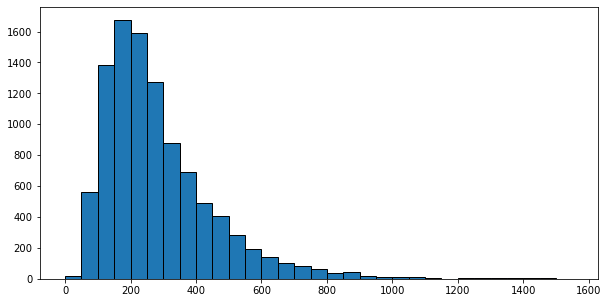

In [12]:
np.random.seed(1)
partDtst = monte_carlo(200, .1, .4, 500, 10000)
plt.figure(figsize=[10,5])
plt.hist(partDtst[0], edgecolor = 'k', bins=np.arange(0, 1600, 50))
plt.show()

Below we show the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final stock prices

In [13]:
print(f'10th percentile: {np.round(np.percentile(partDtst[0],10),2)}')
print(f'25th percentile: {np.round(np.percentile(partDtst[0],25),2)}')
print(f'50th percentile: {np.round(np.percentile(partDtst[0],50),2)}')
print(f'75th percentile: {np.round(np.percentile(partDtst[0],75),2)}')
print(f'90th percentile: {np.round(np.percentile(partDtst[0],90),2)}')

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility
This section investigates the impact of voltatility on our simulated stock returns. This is achieved through nearly identical Monte Carlo simuations save the volatility parameter.

In [14]:
np.random.seed(1)        #only 3rd and 4th decimal of average yields change each run. Is that correct?
StockA = monte_carlo(100, .12, .3, 150, 10000)
StockB = monte_carlo(100, .12, .7, 150, 10000)
print(f'Average Annual Yield for A over 10000 runs: {round(np.mean(StockA[1]),4)}\n\
Average Annual Yield for B over 10000 runs: {round(np.mean(StockB[1]),4)}')

Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


Below we investigate the final prices for our two different volatile stocks

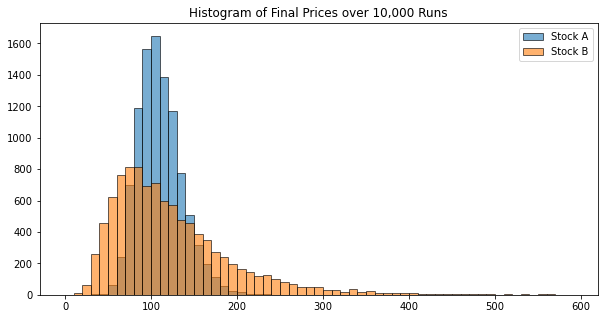

In [15]:
plt.figure(figsize=[10,5])
plt.hist(StockA[0], edgecolor = 'k', bins=np.arange(0, 600, 10), alpha = .6, label = 'Stock A')
plt.hist(StockB[0], edgecolor = 'k', bins=np.arange(0, 600, 10), alpha = .6, label = 'Stock B')
plt.title("Histogram of Final Prices over 10,000 Runs")
plt.legend()
plt.show()

## Part F: Comparing Two Stocks
In this section we run monte carlo simulation on two stocks with different parameters and then compare and contrast their performance

In [16]:
np.random.seed(1)
StockA = np.zeros(10000)
StockA = np.array([[]])
StockB = np.array([[]])
StockA = monte_carlo(120, .08, .2, 252, 10000)
StockB = monte_carlo(120, .05, .5, 252, 10000)
a_gt_b = 0
a_gt_150 = 0
b_gt_150 = 0
a_lt_100 = 0
b_lt_100 = 0
for i in range(len(StockA[0])):                     #StockA[0] should return the 'final_prices' arrary
    if StockA[0][i] > StockB[0][i]:                 #StockA[0][i] should be the single final price value the ith element
        a_gt_b += 1
    if StockA[0][i] > 150:
        a_gt_150 += 1
    if StockA[0][i] < 100:
        a_lt_100 += 1
    if StockB[0][i] > 150:
        b_gt_150 += 1
    if StockB[0][i] < 100:
        b_lt_100 += 1
print(f'Proportions of runs in which... \n\
-------------------------------\n\
A ends above B:   {round(a_gt_b/len(StockA[0]),4)} \n\
A ends above 150: {round(a_gt_150/len(StockA[0]),4)} \n\
B ends above 150: {round(b_gt_150/len(StockB[0]),4)} \n\
A ends below 100: {round(a_lt_100/len(StockA[0]),4)} \n\
B ends below 100: {round(b_lt_100/len(StockB[0]),4)}')

Proportions of runs in which... 
-------------------------------
A ends above B:   0.5206 
A ends above 150: 0.2338 
B ends above 150: 0.3619 
A ends below 100: 0.095 
B ends below 100: 0.3195


## Part G: Expected Call Payoff
In this section we will be evaluating stock options. We will use monte carlo to simulate a stock price over a period of time and use its end price to determine if the option pays out or not

In [17]:
np.random.seed(1)
call = monte_carlo(200, .11, .4, 252, 10000)
print(np.mean(np.where(call[0] > 225, call[0] - 225, 0)))

45.898432


**Below are alternate methods for learning purposes and validation of the answer**

In [18]:
#alternate method for learning purposes
print((call[0] - 225) > 0)
temp = call[0] - 225
print(np.sum(temp[temp > 0])/len(call[0]))

# is there another boolean masking method to include the zeros in my temp array? this would allow np.mean and be shorter code

#Also, is there a more efficient method than using my intermediate temp variable?

[ True  True  True ...  True False False]
45.898432


In [19]:
#alternate method using loops I'm confident with to check answer from above
count = 0
for i in range(len(call[0])):
    if call[0][i] >225:
        count += (call[0][i] - 225)
print(count/len(call[0]))

45.89843200000013
